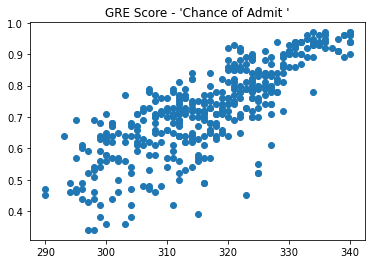

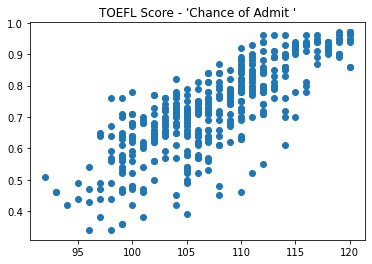

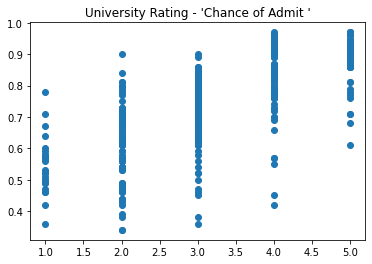

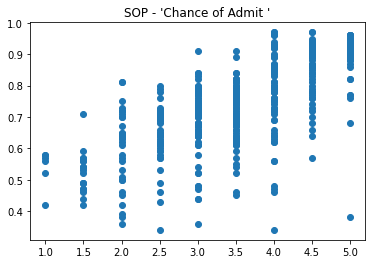

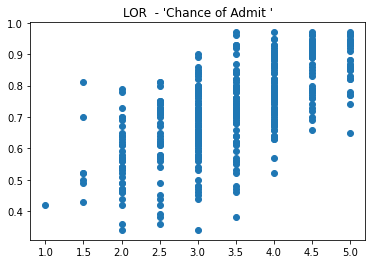

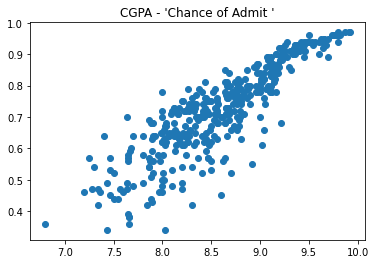

Простая линейная регрессия('TOEFL Score'): 
R2:  0.6217126483450095
MSE:  0.00687252955045217
RSS:  0.5498023640361736
Множественная линейная регрессия: 
R2:  0.7594824470194684
MSE:  0.0043695988856870425
RSS:  0.3495679108549634
Полиномиальная регрессия по независимым величинам 2 степени: 
R2:  0.7380639942527529
MSE:  0.004758718291663023
RSS:  0.38069746333304183
Полиномиальная регрессия по независимым величинам 3 степени: 
R2:  0.16195612062877462
MSE:  0.015225149084041123
RSS:  1.2180119267232898


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_excel("C:/Users/A_And/Downloads/05_Зачисление.xls")

cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
for col in cols:
 plt.scatter(data[col], data['Chance of Admit '])
 plt.title(col + " - 'Chance of Admit '")
 plt.show()


x = data[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = data['Chance of Admit ']
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=0)


lin_model = LinearRegression()
X = np.reshape(train_x['TOEFL Score'].values, (-1, 1))
lin_model.fit(X, train_y)
VAL_X = np.reshape(val_x['TOEFL Score'].values, (-1, 1))
y_pred = lin_model.predict(VAL_X)
print("Простая линейная регрессия('TOEFL Score'): ")
print("R2: ", r2_score(val_y, y_pred))
print("MSE: ", mean_squared_error(val_y, y_pred))
print("RSS: ", ((val_y - y_pred)**2).sum())


lin_model = LinearRegression()
lin_model.fit(train_x, train_y)
y_pred = lin_model.predict(val_x)
print("Множественная линейная регрессия: ")
print("R2: ", r2_score(val_y, y_pred))
print("MSE: ", mean_squared_error(val_y, y_pred))
print("RSS: ", ((val_y - y_pred)**2).sum())

def polynomial_regression(degree):
 poly_feat = PolynomialFeatures(degree=degree, include_bias=False)
 poly_train_x = poly_feat.fit_transform(train_x)
 poly_model = LinearRegression()
 poly_model.fit(poly_train_x, train_y)
 y_pr = poly_model.predict(poly_feat.fit_transform(val_x))
 print("Полиномиальная регрессия по независимым величинам", degree, "степени: " )
 print("R2: ", r2_score(val_y, y_pr))
 print("MSE: ", mean_squared_error(val_y, y_pr))
 print("RSS: ", ((val_y - y_pr) ** 2).sum())
polynomial_regression(degree=2)
polynomial_regression(degree=3)